## Набор данных lris

__Iris__ - классический набор данных, созданный еще в 1930-х годах; это один из первых современных примеров статистической классификации.

Он __представляет собой__ собрание морфологических измерений нескольких сортов ирисов. Эти измерения позволяют различить, разные сорта цветов. В наши дни образцы идентифицируются генетическими отпечатками ДНК, но в 1930-е годы роль ДНК в генетике еще не была открыта.
Для каждого растения измерялись четыре характеристики:
* длина чашелистика (__length sepal__);
* ширина чашелистика (__width sepal__);
* длина лепестка (__length petal__);
* ширина лепестка (__width petal__).

В общем случае числовые характеристики, используемые для описания данных, называются __признаками__. Признаки можно измерять непосредственно или вычислять на основе промежуточных
данных.

В этом числовом наборе четыре признака. Дополнительно для каждого растения записывался его вид. Задача ставится так: __"Имея такие примеры, сможем ли мы уверенно определить, вид нового цветка по измерениям его признаков?"__.

Это так называемая __проблема обучения с учителем__, или классификации: __располагая помеченными примерами, вывести правило, которое можно было бы применить, к другим примерам__. 

Набор данных Iris небольшой (150 примеров, по четыре признака в каждом), легко поддается визуализации и манипулированию.

In [1]:
# Загружаем данные функцией load_iris из sklearn
from sklearn.datasets import load_iris

data = load_iris()

# load_iris возвращает объект с несколькими полями
features = data.data
feature_names = data.feature_names

print "Features: %s" % str(features.shape)
print "\t".join(feature_names)
print '\n'.join(('\t'*3).join('%0.1f' %x for x in y) for y in features[:5,])

target = data.target
target_names = data.target_names

print "\nTarget: %s" % str(target.shape)
print target_names
print target

Features: (150L, 4L)
sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
5.1			3.5			1.4			0.2
4.9			3.0			1.4			0.2
4.7			3.2			1.3			0.2
4.6			3.1			1.5			0.2
5.0			3.6			1.4			0.2

Target: (150L,)
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Визуализация - первый шаг к цели

На каждом подграфике ниже показаны все точки в проекции на двумерную плоскость. Стоящая особняком группа (__треугольники__) - растения вида __Iris Setosa__, а в центре находятся __Iris Versicolor__ plants (__кружочки__) и __Iris Virginica__ (__крестики__). 

Как видим, __выделяются две крупные группы__: Iris Setosa и Iris Versicolor совместно с Iris Virginica.

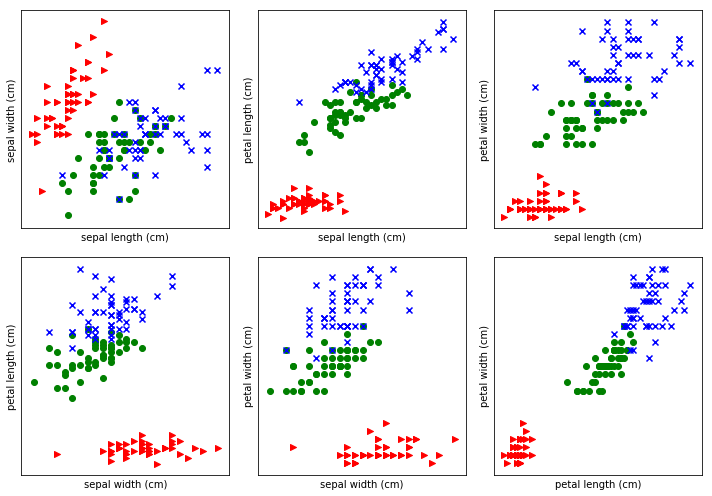

In [2]:
from matplotlib import pyplot as plt
fig,axes = plt.subplots(2, 3, figsize=(10,7))

pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Set up 3 different pairs of (color, marker)
color_markers = [('r', '>'), ('g', 'o'), ('b', 'x'),]

# Перебираем различные комбинации признаков
for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]

    for t in range(target_names.shape[0]):
        # Использовать различные color/marker для каждого класса `t`
        c, marker = color_markers[t]
        ax.scatter(features[target == t, p0], 
                   features[target == t, p1], 
                   marker = marker, 
                   c = c)
    ax.set_xlabel(feature_names[p0])
    ax.set_ylabel(feature_names[p1])
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

## Построение первой модели классификации

Если цель - различить три вида цветов, то можно сразу же предложить несколько подходов, стоит только взглянуть на данные. Например, отличить Iгis Setosa от двух других видов можно по длине лепестка (petal length). Следующий код определяет, где проходит граница:

In [3]:
# Используем прихотливое индексирование (fancy indexing) NumPy, 
# чтобы получить массив строк
labels = target_names[target]

#Длина лепестка (petal length) - признак в позиции 2
plength = features[:, 2]
#Строим массив булевых значений
is_setosa = (labels == 'setosa')

#Это важный шаг
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()

print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


Итак, мы можем построить простую модель: __если длина лепестка меньше 2, то это Iris Setosa, иначе либо Iris Virginica, либо Iris Versicolor__.

Наша первая модель отлично справляется с отделением Iris Setosa от двух других видов, не делая ни одной ошибки. В данном случае мы вообще не прибегали к машинному обучению, а просто изучили
данные самостоятельно и нашли, как разделить классы. __Машинное обучение__ начинается, когда мы пишем код, способный произвести такое разделение автоматически.

Задача распознавания Iris Setosa оказалась очень легкой. Но вот как выбрать наилучший порог, позволяющий отличить Iris Virginica от Iris Versicolor, сразу не ясно. Более того, мы видим, что идеальное разделение по этим признакам вообще невозможно. Но можно попытаться найти лучшее из возможного: __такое разделение, при котором количество ошибок минимально__.

Сначала выберем только признаки и метки, не относящиеся к Setosa:

In [4]:
features = features[~is_setosa]
labels = labels[~is_setosa]

is_virginica = (labels == 'virginica')

Массив __is_setosa__ - это массив булевых величин, с его помощью мы выбираем подмножества двух других массивов, __features__ и __labels__.
Наконец, мы создаем новый булев массив, сравнивая метки на равенство.

Далее в цикле перебираем все возможные признаки и пороги, чтобы узнать, при каком достигается наилучшая accuracy. __Accuracy__ - это просто доля правильно классифицированных примеров.

In [5]:
def fit_model(features, labels):
    '''Обучение простой пороговой модели'''
    best_acc = -1.0   # Инициализируем best_acc значением, меньшим минимально возможного

    for fi in range(features.shape[1]):
        # Мы будем проверять все возможные пороговые значения
        thresh = features[:,fi].copy()
        
        # Проверяем все признаки по порядку:
        thresh.sort()
        for t in thresh:
            # Получить вектор для признака 'fi'
            feature_i = features[:, fi]
            # применить порог 't'
            pred = (feature_i > t)
            
            # Измерить accuracy
            acc = (pred == labels).mean()
            rev_acc = (pred == ~labels).mean()
            
            if rev_acc > acc:
                reverse = True
                acc = rev_acc
            else:
                reverse = False

            if acc > best_acc:
                best_acc = acc
                best_fi = fi
                best_t = t
                best_reverse = reverse
        
    # Модель представляет собой порог и индекс
    return best_t, best_fi, best_reverse, best_acc

print fit_model(features, is_virginica)

(1.6000000000000001, 3, False, 0.93999999999999995)


Необходимо проверить два порога для каждого признака и значения: __мы проверяем условие "больше порога" и противоположное ему__. Именно поэтому в показанном выше коде нужна переменная
__rev_acc__, в ней хранится accuracy реверсирования сравнения.

В последних строках выбирается наилучшая модель. Сначала мы сравниваем предсказанные метки __pred__ с фактическими, __is_virginica__. Вычисление среднего значения результатов сравнения (__mean__) дает долю правильных результатов, то есть __accuracy__. В конце цикла все возможные пороги для всех признаков проверены, и переменные __best_fi__, __best_t__ и __best_reverse__ описывают модель. Этой информации достаточно для классификации неизвестного ранее объекта, то есть отнесения (assign) его к определенному классу. Что и делается в следующем методе:

In [6]:
def is_virginica_test(fi, t, reverse, example):
    'Применение пороговой модели для новых example'
    test = example[fi] > t
    if reverse:
        test = not test
    return test

Если прогнать этот код для всего набора данных, то модель, признанная лучшей, принимает решения путем разделения по ширине лепестка. Чтобы интуитивно представить, как это работает, полезно построить решающую границу. То есть мы видим, при каких значениях признака принимается одно решение, а при каких - другое, и где проходит граница. 

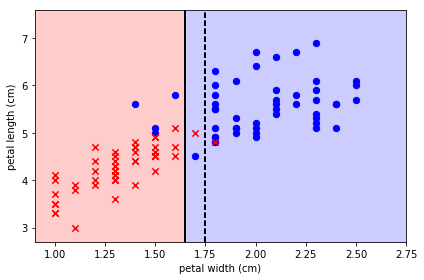

In [7]:
# Фиксируем пороги вручную:
t, t2 = 1.65, 1.75

# Используемые признаки: 3 (petal width) & 2 (petal length)
f0, f1 = 3, 2

# Цвет классифицируемых областей
area1c = (1., .8, .8)
area2c = (.8, .8, 1.)

# Plot от 90% наименьшего значения до 110% наибольшего значения
# (все значения функции положительные, иначе не будет хорошо работать)
x0 = features[:, f0].min() * .9
x1 = features[:, f0].max() * 1.1

y0 = features[:, f1].min() * .9
y1 = features[:, f1].max() * 1.1

fig,ax = plt.subplots()

ax.fill_between([t, x1], [y0, y0], [y1, y1], color=area2c)
ax.fill_between([x0, t], [y0, y0], [y1, y1], color=area1c)

ax.plot([t, t], [y0, y1], 'k', lw=2)
ax.plot([t2, t2], [y0, y1], 'k--', lw=2)

ax.scatter(features[is_virginica, f0],
           features[is_virginica, f1], c='b', marker='o', s=40)
ax.scatter(features[~is_virginica, f0],
           features[~is_virginica, f1], c='r', marker='x', s=40)

ax.set_ylim(y0, y1)
ax.set_xlim(x0, x1)

ax.set_xlabel(feature_names[f0])
ax.set_ylabel(feature_names[f1])

fig.tight_layout()
plt.show()

На графике показаны две области: красная и синяя. __Точки, попадающие в красную область__, классифицируются как Iris Virginica, а __попадающие в синюю область__ - как Iris Versicolor.

В пороговой модели решающая граница всегда будет прямой, параллельной одной из осей. На графике выше показана решающая граница и области по обе стороны от нее. Здесь же показан __альтернативный порог (пунктирная линия)__, при котором достигается точно такая же accuracy. Наш метод выбрал первый порог, но это было абсолютно произвольное решение.

## Оценка качества

### 1) Резервирование данных (holding out data)

В предыдущем разделе была рассмотрена простая модель, она позволяет добиться __accuracy 94%__ на всем наборе данных. Однако такая оценка может оказаться излишне оптимистичной. Мы сначала воспользовались данными для определения порогового значения, а затем теми же данными для оценки качества модели. Разумеется, такая модель будет вести себя лучше, чем любая другая.

В действительности нам нужно __оценить способность модели к обобщению на новые примеры__. Мы должны измерить ее качество на примерах, которые не предъявлялись алгоритму во время обучения. Следовательно, нужно более строгое оценивание и использование зарезервированных данных. __Для этого разобьем данные на две группы: на одной будем обучать модель, а на другой тестировать.__

In [8]:
import numpy as np

def predict(model, features):
    '''Применение модели обучения'''
    # Модель представляет собой результат, возвращаемый с помощью fit_model
    t, fi, reverse, acc = model
    if reverse:
        return features[:, fi] <= t
    else:
        return features[:, fi] > t
    
def accuracy(features, labels, model):
    '''Вычисляет accuracy модели'''
    preds = predict(model, features)
    return np.mean(preds == labels)

In [9]:
# Разделение данных на две части: tasting (тестирование) и training (обучение)
testing = np.tile([True, False], 50)   # testing = [True,False,True,False,True,False...]

# training является отрицанием testing: т.е. данные не используемые для тестирования,
# будут использованы для обучения
training = ~testing

model = fit_model(features[training], is_virginica[training])
train_accuracy = accuracy(features[training], is_virginica[training], model)
test_accuracy = accuracy(features[testing], is_virginica[testing], model)

print('''\
Training accuracy was {0:.1%}.
Testing accuracy was {1:.1%} (N = {2}).
'''.format(train_accuracy, test_accuracy, testing.sum()))

Training accuracy was 96.0%.
Testing accuracy was 90.0% (N = 50).



Результат, показанный __на обучающих данных__ (подмножестве всего набора данных) оказался даже лучше, чем раньше. Но важно отметить, что результат __на тестовых данных__ хуже. Нет ничего неожиданного в том, что accuracy на тестовых данных ниже, чем на обучающих. 
Из графика, где показана решающая граница, видно, что если бы примеров, расположенных близко к границе, не было или если бы какой-то пример, оказавшийся между двумя линиями, отсутствовал, то граница сдвинулась бы немного вправо или влево, так что они оказались бы не по ту сторону от нее.

__Accuracy на обучающих данных__ почти всегда дает чрезмерно оптимистичную оценку качества алгоритма. Измерять следует __accuracy на тестовых данных__, то есть на примерах, которые не
предъявлялись на этапе обучения.

Если модель сложна, то вполне возможно на обучающих данных получить стопроцентную accuracy, а на тестовых - не большую, чем при случайном угадывании!

### Перекрестная проверка (cross-validation)

Выше, резервируя данные, мы решили использовать для обучения только половину имеющихся данных. Быть может, было бы лучше увеличить эту долю. С другой стороны, если оставить для тестирования
слишком мало данных, то может не хватить примеров для оценивания погрешности. В идеале было бы хорошо использовать все данные как для обучения, так и для тестирования, но это невозможно.

Приемлемое приближение к недостижимому идеалу дает метод __перекрестной проверки (cross-validation)__. Одна из его форм называется __перекрестной проверкой с исключением по одному (leave-one-out cross-validation)__. Мы выбираем какой-нибудь пример из имеющихся данных, обучаем модель на всех данных, кроме этого примера, а затем проверяем, правильно ли модель классифицирует этот пример. Этот процесс повторяется для всех элементов набора данных

In [10]:
correct = 0.0

for ei in range(len(features)):
    # выбрать все, кроме одного в позиции `ei`:
    training = np.ones(len(features), bool)
    training[ei] = False
   
    testing = ~training
    
    model = fit_model(features[training], is_virginica[training])
    predictions = predict(model, features[testing])
    correct += np.sum(predictions == is_virginica[testing])

acc = correct/float(len(features))
print('Accuracy: {0:.1%}'.format(acc))

Accuracy: 87.0%


В этом цикле мы тестируем последовательность моделей на всех примерах, а по eгo завершении печатаем усредненный результат. При использовании перекрестной проверки порочный круг (circularity problem) не возникает, потому что каждая модель тестируется на примере, который она не видела при обучении. Поэтому полученную таким образом оценку можно считать надежным показателем обобщаемости модели на новые данные.

__Основная проблема перекрестной проверки с исключением по одному__ состоит в том, что нам приходится проделывать гораздо больше работы. По существу, мы должны обучать новую модель для каждого примера, и с ростом набора данных затраты оказываются очень велики.
Получить преимущества исключения по одному с гораздо меньшими издержками позволяет __х-проходная перекрестная проверка (x-fold cross-validation)__, rде $х$ - небольшое целое число. 

__Например__, в случае пятипроходной проверки мы разбиваем данные на 5 групп. Затем мы обучаем пять моделей, каждый раз исключая из обучающего набора одну группу. Получающийся код похож на приведенный выше, но резервируем мы сразу 20 процентов данных, а не один элемент. Все обученные модели тестируются на данных, входящих в исключенную группу, и результаты усредняются.

<img src = "img/x-fold-cross-validation.jpg">

На этом рисунке показана __пяти проходная проверка__: набор данных разбит на пять групп. На каждом проходе мы резервируем одну группу для тестирования и обучаем модель на остальных четырех. Количество проходов может быть произвольным. Существует компромисс между вычислительной эффективностью (чем больше folds, тем больше необходимо вычислений) и точностью результата (чем больше folds, тем ближе к использованию всех данных для обучения). Пять проходов - разумный компромисс. В этом случае мы используем для обучения 80 процентов данных, результат должен получиться довольно близким к тому, что получился бы при обучении
на всех данных. 

Если данных мало, то можно остановиться на 10 или 20 проходах. В предельном случае, когда проходов столько же, сколько элементов данных, мы получаем просто перекрестную проверку с исключением по одному. С другой стороны, если время вычислений оказывается недопустимо большим, а данных достаточно, можно ограничиться 2 или 3 проходами. 

При отборе групп нужно __следить за их сбалансированностью__. Так, если в какой-то группе все примеры принадлежат одному классу, то результат окажется нерепрезентативным. 

Итак, мы сгенерировали не одну, а несколько моделей. Возникает вопрос - какую из них использовать для классификации новых данных?
__Простейшее решение__ - обучить одну модель на всех обучающих данных. Проведенная ранее перекрестная проверка уже показала, насколько хорошо эта модель будет обобщаться.

__Перекрестная проверка позволяет использовать имеющиеся данные для оценки качества работы выбранного алгоритма. По завершении цикла можно обучить окончательную модель на всех данных.__

Сегодня считается очень дурным тоном обсуждать, даже саму возможность тестирования accuracy классификации на обучающих данных. Дело в том, что результаты могут оказаться совершенно неверными. Измерение и сравнение погрешности следует проводить либо на зарезервированном наборе данных, либо с помощью метода перекрестной проверки.